# Generated ranfigs EDA

In [7]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Load data

In [8]:
RANDFIGS_PATH = Path("../scanner_randfigs").resolve()
RANDFIGS_FILEPATHS = [p for p in RANDFIGS_PATH.iterdir() if  p.is_file()]

In [9]:
r_cfgs = []
for rcfg_file in RANDFIGS_FILEPATHS:
    with open(rcfg_file, 'r') as f:
        cfg = yaml.safe_load(f)
        cfg["Config"] = rcfg_file.stem
        r_cfgs.append(cfg)

In [10]:
df = pd.DataFrame(r_cfgs)

## Bins

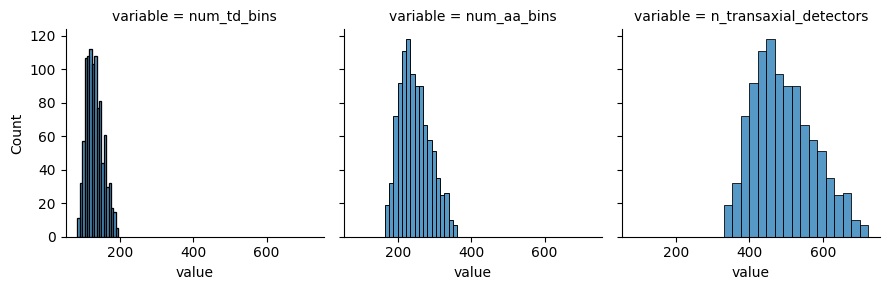

In [40]:
df.pipe(pd.melt, value_vars=["num_td_bins", "num_aa_bins", "n_transaxial_detectors"])\
    .pipe(sns.FacetGrid, col="variable")\
    .map_dataframe(sns.histplot, x="value")

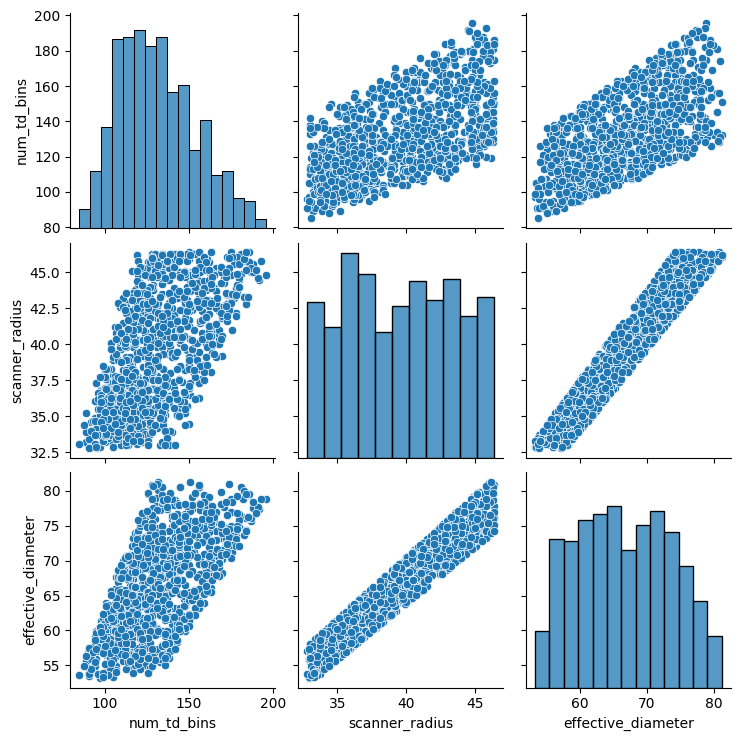

In [45]:
df[["num_td_bins", "scanner_radius", "effective_diameter"]].pipe(sns.pairplot)

## Number of subsets and iterations

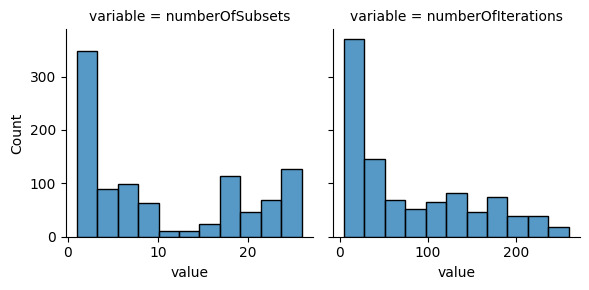

In [12]:
df_subsets = df.pipe(pd.melt, value_vars=["numberOfSubsets", "numberOfIterations"])

g = sns.FacetGrid(df_subsets, col="variable", sharex=False)
g.map_dataframe(sns.histplot, x="value")

Text(0.5, 0, 'num_aa_bins / numberOfSubsets')

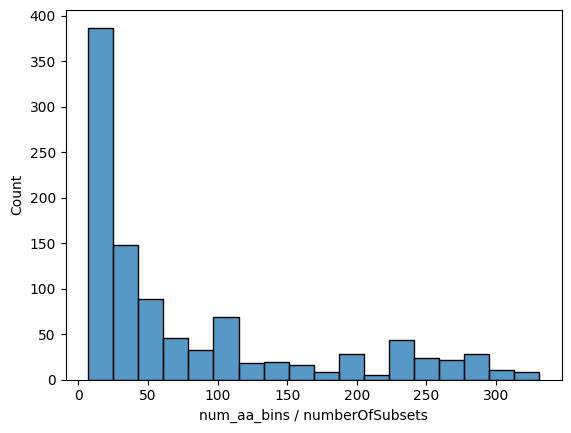

In [13]:
df["num_aa_bins_subsets_ratio"] = df["num_aa_bins"] // df["numberOfSubsets"]
df.pipe(sns.histplot, x="num_aa_bins_subsets_ratio").set_xlabel("num_aa_bins / numberOfSubsets")

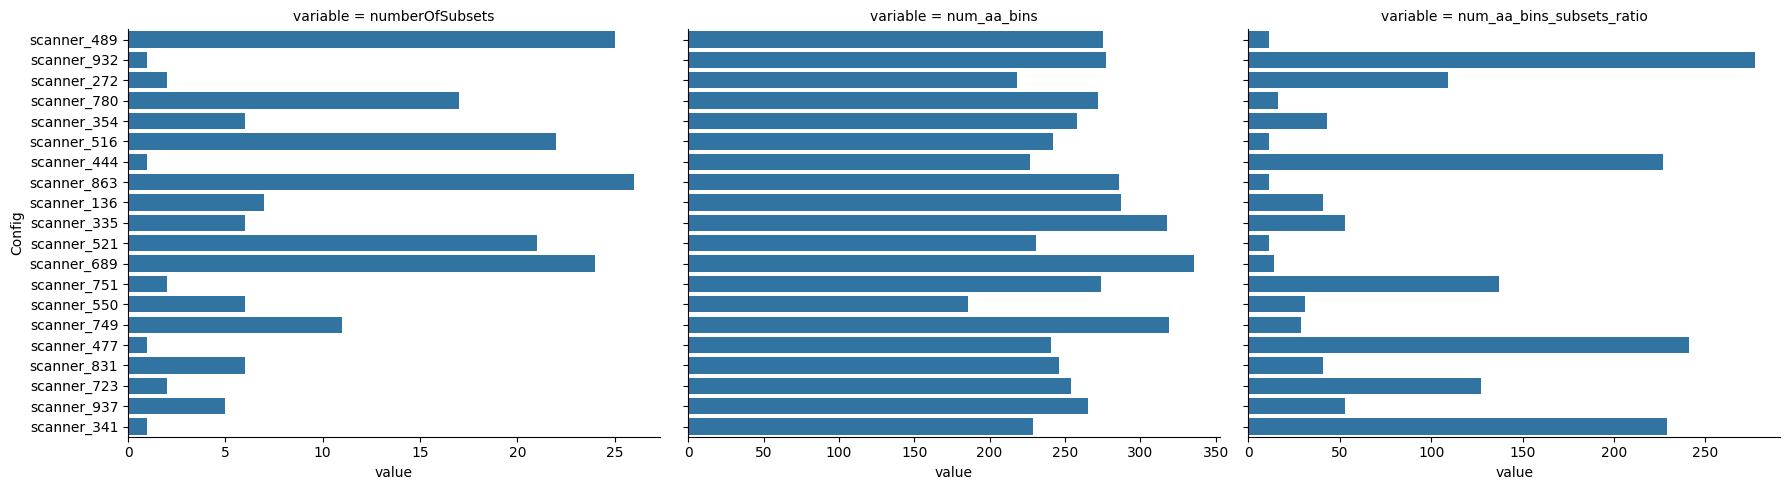

In [14]:
SAMPLES = 20

df_num_subsets = df.iloc[0:SAMPLES]\
    .loc[:, ["numberOfSubsets", "Config", "num_aa_bins_subsets_ratio", "num_aa_bins"]]\
    .pipe(pd.melt, value_vars=["numberOfSubsets", "num_aa_bins", "num_aa_bins_subsets_ratio"], id_vars=["Config"])
        

g = sns.FacetGrid(data=df_num_subsets, col="variable", height=5, aspect= 1.2, sharex=False)
g.map_dataframe(sns.barplot, y="Config", x="value")

## Energy resolution

<AxesSubplot: xlabel='energy_resolution', ylabel='Count'>

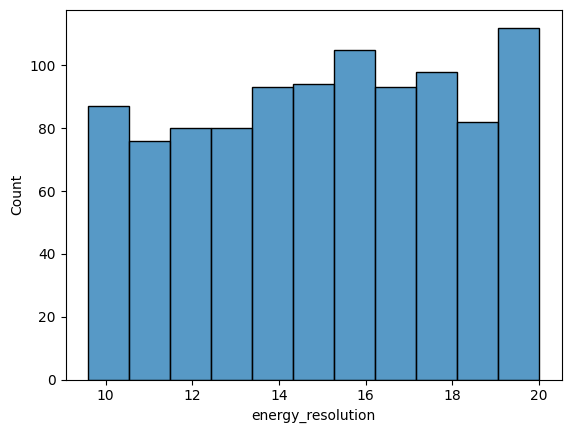

In [15]:
df.pipe(sns.histplot, x="energy_resolution")

Text(515, 200, '511 keV')

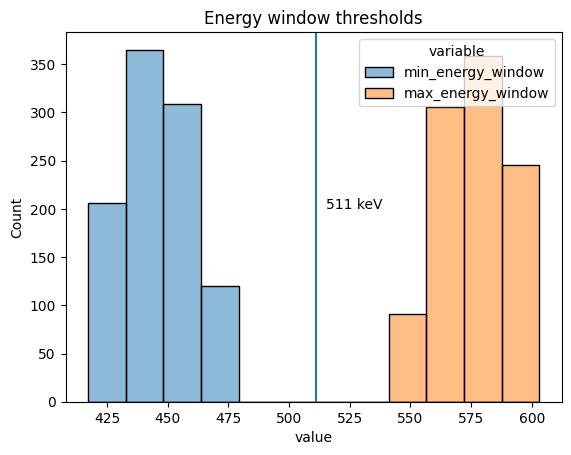

In [16]:
df\
    .pipe(pd.melt, value_vars=["min_energy_window", "max_energy_window"])\
        .pipe(sns.histplot, x="value", hue="variable").set_title("Energy window thresholds")
plt.axvline(511)
plt.text(515, 200, "511 keV")

## Detector size

<AxesSubplot: xlabel='value', ylabel='variable'>

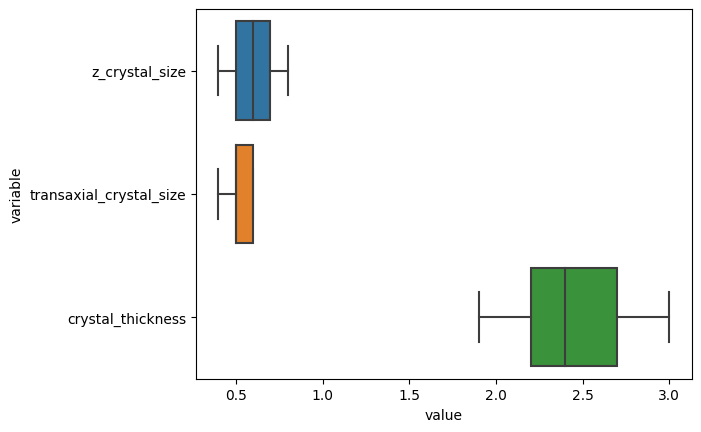

In [17]:
df\
    .pipe(pd.melt, value_vars=["z_crystal_size", "transaxial_crystal_size", "crystal_thickness"])\
        .pipe(sns.boxplot, x="value", y="variable")

## Scanner radius, axial FOV and number of rings

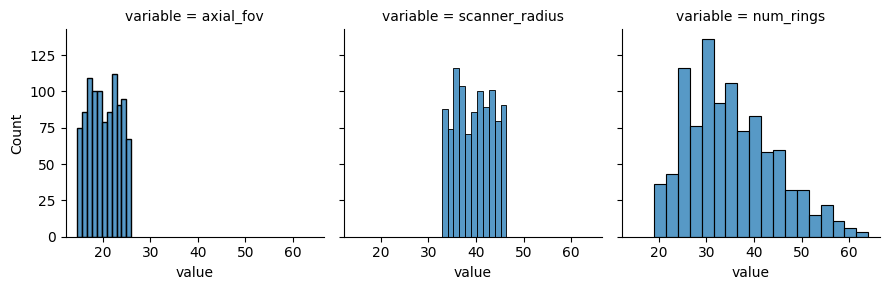

In [18]:
df_ = df.pipe(pd.melt, value_vars=["axial_fov", "scanner_radius", "num_rings"])
g = sns.FacetGrid(df_, col="variable")
g.map_dataframe(sns.histplot, x="value")

## Number of transaxial detectors

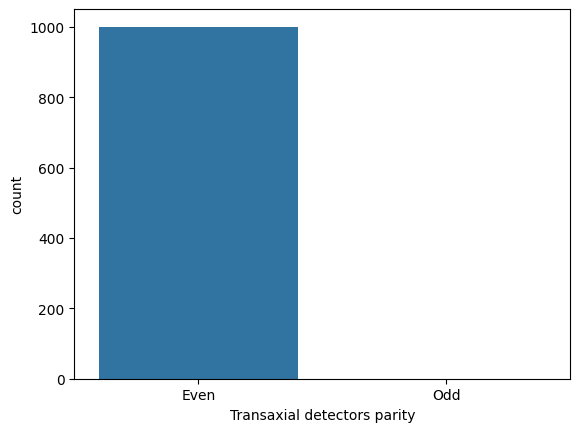

In [19]:
try:
    df["Transaxial detectors parity"] = df["n_transaxial_detectors"].apply(lambda n:  "Even" if n % 2 == 0 else "Odd")
    df.pipe(sns.countplot, x="Transaxial detectors parity", order=["Even", "Odd"])
except KeyError:
    pass


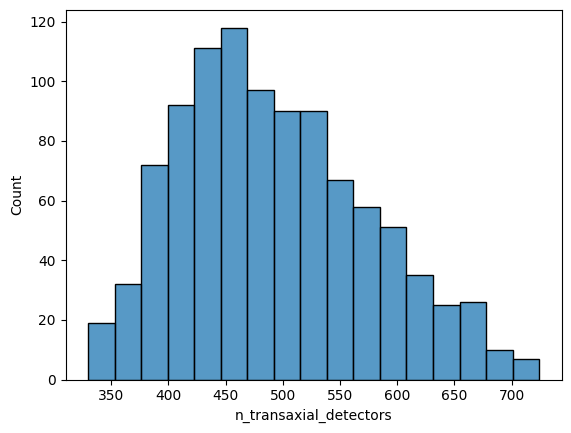

In [20]:
try:
    df.pipe(sns.histplot, x="n_transaxial_detectors")
except ValueError:
    pass